# CLASSIFICADOR NAIVE BAYES

Objetivo: implementação e ajuste do classificador *Naive Bayes* usando o *sklearn*.

Naive Bayes é um classificador probabilístico que pressupõe uma independência entre as classes. Utilizaremos a classe *GaussianNB* disponível no sklearn. Sobre a mesma, vale destacar que supõe que os dados tem uma distribuição gaussiana. Algumas estratégias serão aqui apresentadas, com o intuito de potencializar ao máximo o algoritmo.

## Pacotes para a análise inicial dos dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno


## Sobre os dados:



A base de dados está disponível em <https://www.kaggle.com/andrewmvd/heart-failure-clinical-data?select=heart_failure_clinical_records_dataset.csv> e traz registros com informações sobre a mortalidade causada por insuficiência cardíaca. Ao todo a base possui 299 linhas e 13 colunas.

In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [3]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
data.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

Não há dados faltantes.

## Dicionário

*age*: idade do paciente;

*anaemia*: Diminuição de glóbulos vermelhos ou hemoglobina (Não = 0, Sim = 1);

*high_blood_pressure*: se o paciente tem hipetensão (Não = 0, Sim = 1);

*creatinine_phosphokinase*: nível da enzima CPK no sangue;

*diabetes*: se o paciente tem diabetes (Não = 0, Sim = 1);

*ejection_fraction*: porcentagem de sangue saindo;

*sex*: homem ou mulher (Masculino = 1, Feminino = 0);

*platelets*: plaquetas no sangue;

*serum_creatinine*: nível de creatinina no sangue;

*serum_sodium*: nível de sódio no sangue;

*smoking*: se o paciente fuma (Não = 0, Sim = 1);

*time*: período de acompanhamento;

*DEATH_EVENT*: se o paciente morreu durante o período de acompanhamento (Não = 0, Sim = 1).

## Análise Descritiva Inicial:

In [5]:
#idade
fig = px.histogram(data, x="age", color="DEATH_EVENT", marginal="box", hover_data=data.columns, 
                   labels={
                     "age": "Idade",
                     "count": "Quantidade",
                     "DEATH_EVENT": "Óbito"
                 })
fig.update_layout(title = {'text':'Distribuição das idades','y':0.9,'x':0.5})
fig.show()

Observa-se que o maior registro de mortes está compreendido entre 58 e 62 anos.

In [6]:
#sangue
fig = px.histogram(data, x = 'ejection_fraction', color = 'DEATH_EVENT', marginal='box', hover_data=data.columns,
                   labels={
                     "ejection_fraction": "Porcentagem de sangue",
                     "count": "Quantidade",
                     "DEATH_EVENT": "Óbito"
                 })
fig.update_layout(title = {'text':'Distribuição da Quantidade de Sangue','y':0.9,'x':0.5})
fig.show()

Em relação a variável *ejection_fraction* nota-se uma diferença significativa na distribuição quando comparados os casos onde ocorreu a morte do paciente.

In [7]:
#sexo
fig = px.histogram(data, x = 'age', color = 'sex', marginal='box', hover_data=data.columns,
                   labels={
                     "age": "Idade",
                     "count": "Quantidade",
                     "sex": "Gênero"
                 })
fig.update_layout(title = {'text':'Distribuição das idades em relação ao gênero','y':0.9,'x':0.5})
fig.show()

A distribuição quanto ao gênero por idade não apresenta diferença, quando observada pela mediana.

In [8]:
 import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
data.DEATH_EVENT.value_counts().iplot(kind='bar', title='ÓBITOS')



A base apresenta 96 registros de óbitos contra 203 não óbitos.

## Dispersão e correlação entre as variáveis

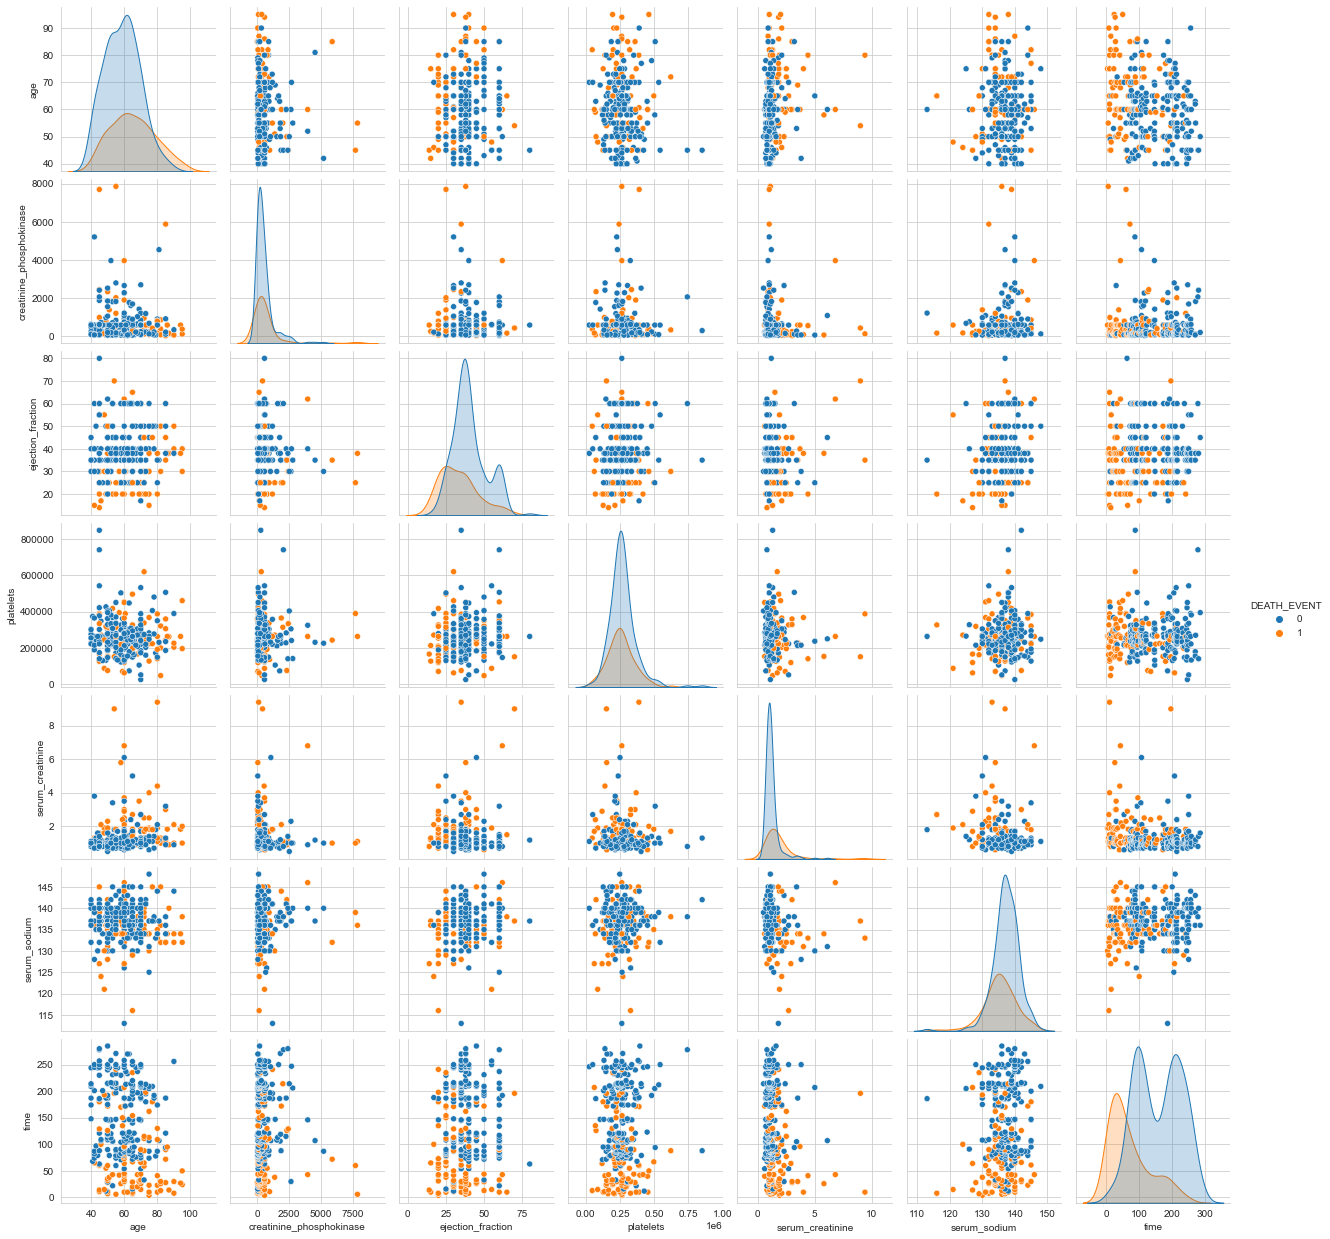

In [9]:
dados_pair = data.drop(['anaemia', 'high_blood_pressure', 'diabetes', 'sex', 'smoking'], axis=1)
sns.set_style("whitegrid")
sns.pairplot(dados_pair, hue = 'DEATH_EVENT')

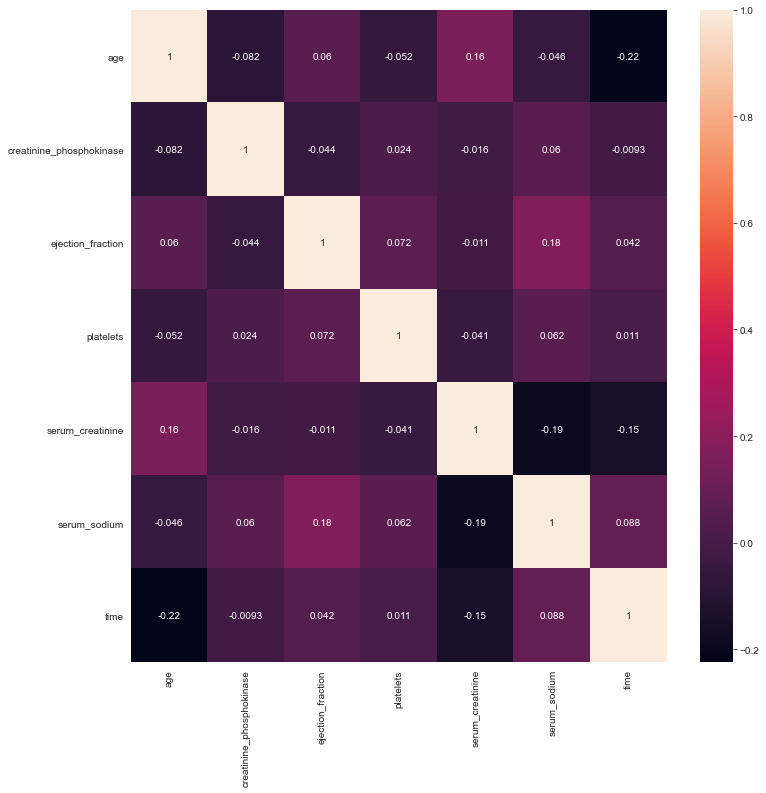

In [10]:
#verificando multicoinearidade
dados_pair = dados_pair.drop('DEATH_EVENT', axis=1)
dados_corr = dados_pair.corr(method='pearson')
plt.figure(figsize=(12,12))
sns.heatmap(dados_corr, annot=True)
plt.show()


Não há variáveis altamente correlacionadas.

## CONSTRUINDO E AVALIANDO O MODELO

## Pacotes

In [11]:
## Modelo
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import roc_auc_score
from sklearn import metrics

Dividindo a base em treino e teste e construindo o grid para encontrar o melhor hiperparâmetro.

In [12]:
#train test
X = data.drop(['DEATH_EVENT'], axis=1)
y = data.DEATH_EVENT
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 42)

#tune
gaussian_nb = GaussianNB()
params = {'var_smoothing':[1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15, 1e-20]}
gaussian_nb_grid = GridSearchCV(gaussian_nb, param_grid = params, n_jobs=-1, verbose=1, cv=5)
gaussian_nb_grid.fit(X_train, y_train)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    4.6s finished


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                           1e-07, 1e-08, 1e-09, 1e-10, 1e-11,
                                           1e-12, 1e-13, 1e-14, 1e-15, 1e-20]},
             verbose=1)

In [13]:
print('Train Accuracy : %.3f'%gaussian_nb_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%gaussian_nb_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%gaussian_nb_grid.best_score_)
print('Best Parameters : ',gaussian_nb_grid.best_params_)

Train Accuracy : 0.830
Test Accuracy : 0.747
Best Accuracy Through Grid Search : 0.835
Best Parameters :  {'var_smoothing': 1e-08}


0.83 de acurácia nos dados de treino e 0.75 nos dados de teste.

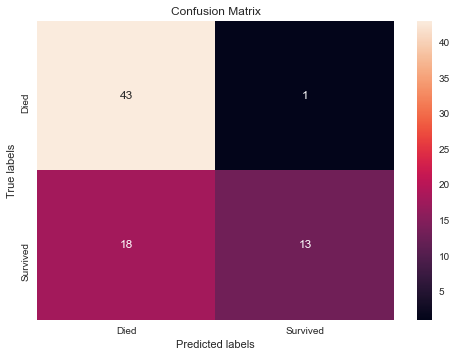

In [14]:
y_pred = gaussian_nb_grid.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Died', 'Survived']); ax.yaxis.set_ticklabels(['Died', 'Survived']);

C:\Users\napp_\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning:

could not determine class_counts_ from previously fitted classifier



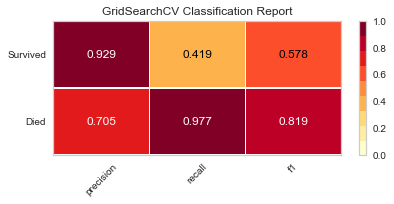

<AxesSubplot:title={'center':'GridSearchCV Classification Report'}>

In [15]:
fig, ax = plt.subplots(figsize=(6,3))
gau_viz =ClassificationReport(gaussian_nb_grid, classes=['Died', 'Survived'])
gau_viz.score(X_test, y_test)
gau_viz.poof()

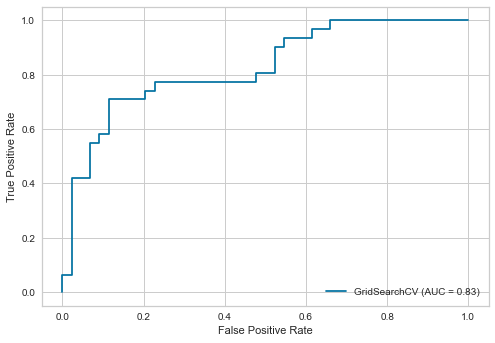

In [16]:
metrics.plot_roc_curve(gaussian_nb_grid, X_test, y_test)  

## Melhorando a performace do modelo



Uma boa prática para esse algoritmo pode ser a utilização dos dados contínuos separados em bins. Vamos utlizar o *KBinsDiscretizer* (que realizará essa tarefa) e comparar com os resultados anteriores.

Faremos essa separação apenas para as colunas *platelets*, *serum_sodium*, *age*, *serum_creatinine* e *creatinine_phosphokinase*, pois são as que apresentam uma maior variabilidade nos dados.

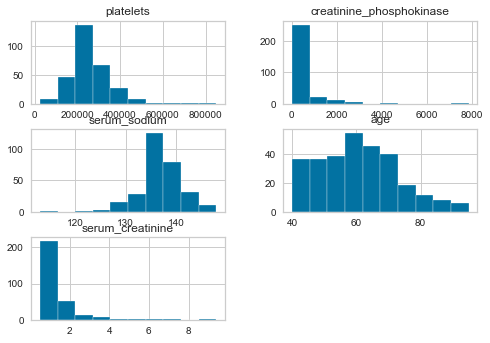

In [17]:
## TRANSFORMAÇÃO DE DISCRETIZAÇÃO UNIFORME
data_disc = data[['platelets','creatinine_phosphokinase', 'serum_sodium','age', 'serum_creatinine']]
data_bin = data.drop(['creatinine_phosphokinase', 'platelets','DEATH_EVENT', 'serum_sodium','age', 'serum_creatinine'], axis=1)
data_disc.hist()
plt.show()

Realizando a discretização.

In [18]:
transform = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
data_disc = transform.fit_transform(data_disc)
data_disc = pd.DataFrame(data_disc)
data_disc.head()

0    1    2    3    4
0  2.0  0.0  4.0  6.0  1.0
1  2.0  9.0  6.0  2.0  0.0
2  1.0  0.0  4.0  4.0  0.0
3  2.0  0.0  6.0  1.0  1.0
4  3.0  0.0  0.0  4.0  2.0

Vamos agrupar os dados transformados, dividir em treino e teste e verificar o seu desempenho.

In [19]:
X = pd.concat([data_bin, data_disc], axis=1)
y = data.DEATH_EVENT
#train test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 42)
#tune
params = {'var_smoothing':[1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15, 1e-20]}
gaussian_nb_grid = GridSearchCV(gaussian_nb, param_grid = params, n_jobs=-1, verbose=1, cv=5)
gaussian_nb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.1s finished


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                           1e-07, 1e-08, 1e-09, 1e-10, 1e-11,
                                           1e-12, 1e-13, 1e-14, 1e-15, 1e-20]},
             verbose=1)

In [20]:
print('Train Accuracy : %.3f'%gaussian_nb_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%gaussian_nb_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%gaussian_nb_grid.best_score_)
print('Best Parameters : ',gaussian_nb_grid.best_params_)

Train Accuracy : 0.871
Test Accuracy : 0.813
Best Accuracy Through Grid Search : 0.862
Best Parameters :  {'var_smoothing': 0.01}


[Text(0, 0.5, 'Died'), Text(0, 1.5, 'Survived')]

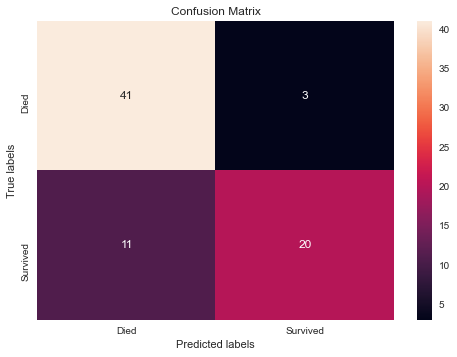

In [21]:
y_pred = gaussian_nb_grid.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Died', 'Survived']); ax.yaxis.set_ticklabels(['Died', 'Survived'])

C:\Users\napp_\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning:

could not determine class_counts_ from previously fitted classifier



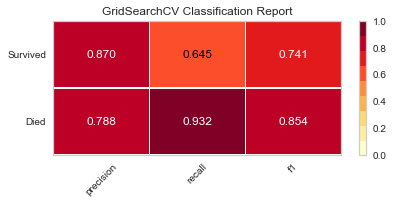

<AxesSubplot:title={'center':'GridSearchCV Classification Report'}>

In [22]:
fig, ax = plt.subplots(figsize=(6,3))
gau_viz =ClassificationReport(gaussian_nb_grid, classes=['Died', 'Survived'])
gau_viz.score(X_test, y_test)
gau_viz.poof()

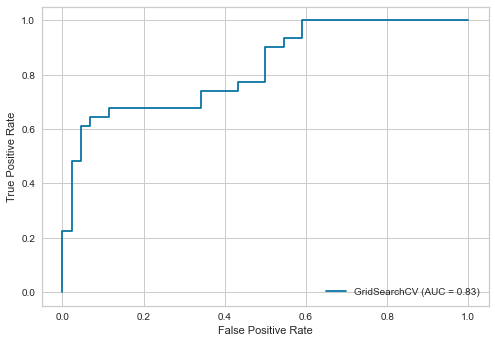

In [23]:
y_predict = gaussian_nb_grid.predict(X_test)
roc_auc_score(y_test, y_predict)
metrics.plot_roc_curve(gaussian_nb_grid, X_test, y_test)  

Percebe-se uma melhora no desempenho, com um suave aumento da acurácia para 0.81 nos dados de teste (registrada também na matriz de confusão).

A quantidade de bins é um hiperparâmetro que pode ser ajustado, visto que utilizamos o valor 10 como teste inicial. Vamos realizar essa procura e verificar o desempenho.

>2 0.732 (0.103)
>3 0.788 (0.096)
>4 0.833 (0.075)
>5 0.830 (0.078)
>6 0.820 (0.071)
>7 0.836 (0.062)
>8 0.829 (0.068)
>9 0.833 (0.053)
>10 0.835 (0.068)


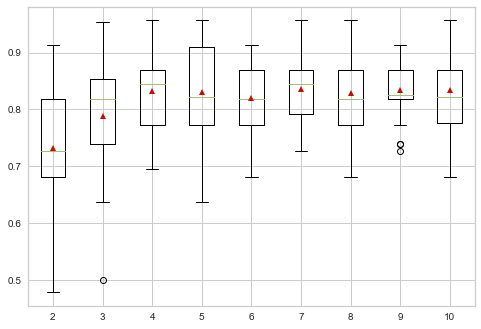

In [24]:
#tunando o número de bins
def get_models():
	models = dict()
	for i in range(2,11):
		# define the pipeline
		trans = KBinsDiscretizer(n_bins=i, encode='ordinal', strategy='quantile')
		model = GaussianNB()
		models[str(i)] = Pipeline(steps=[('t', trans), ('m', model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

Quando bins=7, podemos perceber uma acurácia ligeiramente melhor (0.842). Vamos rodar novamente o modelo com bins=7.

In [25]:
transform = KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='uniform')
data_disc = transform.fit_transform(data_disc)
data_disc = pd.DataFrame(data_disc)

X = pd.concat([data_bin, data_disc], axis=1)
y = data.DEATH_EVENT
#train test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 42)
#tune
params = {'var_smoothing':[1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15, 1e-20]}
gaussian_nb_grid = GridSearchCV(gaussian_nb, param_grid = params, n_jobs=-1, verbose=1, cv=5)
gaussian_nb_grid.fit(X_train, y_train)

print('Train Accuracy : %.3f'%gaussian_nb_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%gaussian_nb_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%gaussian_nb_grid.best_score_)
print('Best Parameters : ',gaussian_nb_grid.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.1s finished


Train Accuracy : 0.857
Test Accuracy : 0.813
Best Accuracy Through Grid Search : 0.862
Best Parameters :  {'var_smoothing': 0.001}


[Text(0, 0.5, 'Died'), Text(0, 1.5, 'Survived')]

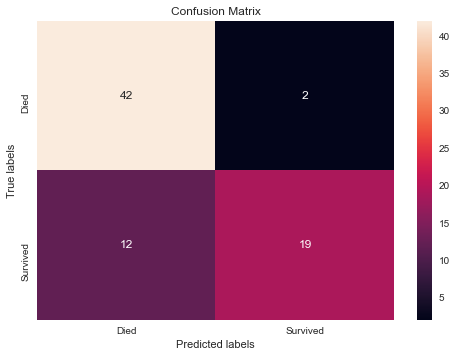

In [26]:
y_pred = gaussian_nb_grid.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Died', 'Survived']); ax.yaxis.set_ticklabels(['Died', 'Survived'])

Não houve um ganho significativo na acurácia.

## CONSIDERAÇÕES FINAIS

O algoritmo Naive Bayes é um classificador extremamente poderoso e que, com pequenos ajustes, pode melhorar o seu desempenho e trazer resultados extremamente positivos. Vale a pena verificar outras duas classes disponíveis no *sklearn* : o *MultinomilaNB* e o *BernoulliNB*.

Recursos como a normalização dos dados e um melhor balanceamento das classes podema ajudar a melhorar esse desempenho.